# MNIST digit recognition task
## Yijing Xiao

## https://www.kaggle.com/c/digit-recognizer

I was learning Python and found this interesting task of recognizing images of 10 digits. 

- import some libraries

In [8]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import pyplot
import matplotlib as mpl

- Data preparation

First I read csv (comma separated value) data with pandas libaray. The data is of shape N * d, N being the number of instances, and d being the data dimension. The first column is the label of value 0 - 9, corresponding to digits 0 - 9. The remaining 784 values are pixels of an image of size 28 * 28. 

In [20]:
data = pd.read_csv("train.csv")
data.head()
image_size = data.iloc[:, 1:].values.shape[1]
image_width = image_height = np.ceil(np.sqrt(image_size)).astype(np.uint8)
image_width

28

The following function renders the image from a 784 dimensional vector. I borrowed this function from somewhere but I forgot the source, sorry for not quoting the source of the code. 

In [16]:
def show_fMNIST_example(image):
    image = image[-28**2:]
    image = image.reshape(28,28)

    fig = pyplot.figure()
    ax = fig.add_subplot(1,1,1)
    imgplot = ax.imshow(image, cmap=mpl.cm.Greys)
    imgplot.set_interpolation('nearest')
    ax.xaxis.set_ticks_position('top')
    ax.yaxis.set_ticks_position('left')
    pyplot.show()

I read from some blog saying that normalization can help the training of a model, so here is a simple function to normalize an image. The main idea is to compute the mean and standard deviation of a vector, and then at each dimension of the vector, subtract the mean and divide by the standard deviation. You can see the effect of normalizing the image, the image color becomes smoother among pixels. 

VISUALIZE BEFORE NORMALIZATION


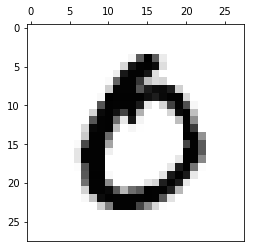

VISUALIZE AFTER NORMALIZATION


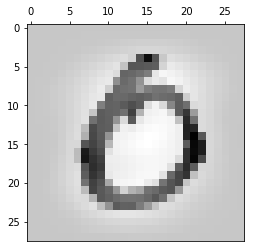

label: 0


In [21]:
def get_mu_sig(data):
    #Compute training data statistics for Normalization
    mu = data.mean(axis=0, keepdims=True)
    sig = data.std(axis=0, keepdims=True)
    sig[np.equal(sig,0)]=1.0
    return mu, sig

def normalize_data(X, mu, sig):
    return (X-mu)/sig

X = data.iloc[:, 1:].values
y = data.iloc[:, 1].values
print('VISUALIZE BEFORE NORMALIZATION')
show_fMNIST_example(X[200, :])
mu, sig = get_mu_sig(X)
X_normalized = normalize_data(X, mu, sig)
print('VISUALIZE AFTER NORMALIZATION')
show_fMNIST_example(X_normalized[200, :])
print("label: {}".format(y[200]))